Drive already mounted at /content/Mydrive; to attempt to forcibly remount, call drive.mount("/content/Mydrive", force_remount=True).
Epoch: 0 Traning Loss: tensor(3.0139, device='cuda:0')
Epoch: 10 Traning Loss: tensor(2.8130, device='cuda:0')
Epoch: 20 Traning Loss: tensor(2.8111, device='cuda:0')
Epoch: 30 Traning Loss: tensor(2.7853, device='cuda:0')
Epoch: 40 Traning Loss: tensor(2.7605, device='cuda:0')
Epoch: 50 Traning Loss: tensor(2.7217, device='cuda:0')
Epoch: 60 Traning Loss: tensor(2.6719, device='cuda:0')
Epoch: 70 Traning Loss: tensor(2.6296, device='cuda:0')
Epoch: 80 Traning Loss: tensor(2.6008, device='cuda:0')
Epoch: 90 Traning Loss: tensor(2.5817, device='cuda:0')
Epoch: 100 Traning Loss: tensor(2.5612, device='cuda:0')
Epoch: 110 Traning Loss: tensor(2.5485, device='cuda:0')
Epoch: 120 Traning Loss: tensor(2.5390, device='cuda:0')
Epoch: 130 Traning Loss: tensor(2.5226, device='cuda:0')
Epoch: 140 Traning Loss: tensor(2.5088, device='cuda:0')
Epoch: 150 Traning Loss

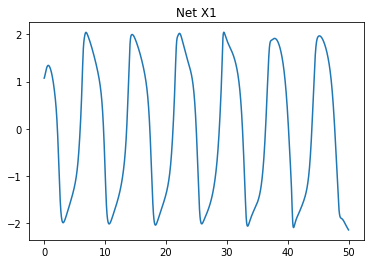

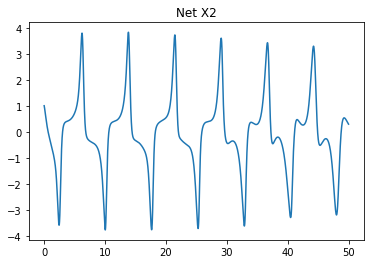

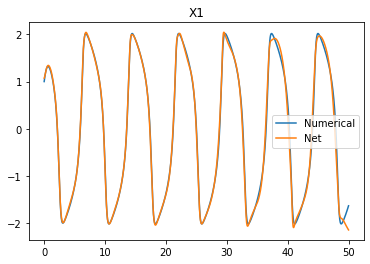

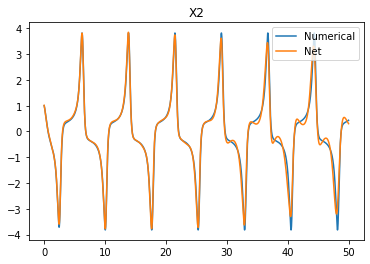

In [ ]:


import torch
import torch.nn as nn
from torch.nn.functional import relu
from torch.autograd import Variable
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/Mydrive')


## Load numerical solution
import scipy.io
mat = scipy.io.loadmat('/content/Van_der_Pol_mu2.mat')
VanDerPolmu2 = mat['data2']


mat = scipy.io.loadmat('/content/Van_der_Pol_mu15.mat')
VanDerPolmu15 = mat['data']
NN=100
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.regressor = nn.Sequential(nn.Linear(1, NN),
                                       nn.Tanh(),
                                       nn.Linear(NN, NN),
                                       nn.Tanh(),
                                       nn.Linear(NN, NN),
                                       nn.Tanh(),
                                       nn.Linear(NN, NN),
                                       nn.Tanh(),
                                       nn.Linear(NN, NN),
                                       nn.Tanh(),
                                       nn.Linear(NN, NN),
                                       nn.Tanh(),
                                       nn.Linear(NN, 2))
    def forward(self, x):
        output = self.regressor(x)
        return output


def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.xavier_uniform_(m.weight)

LEARNING_RATE = 5e-4
EPOCHS = 5000

#Boundary Conditions
# t_bc = np.array([[0]])
# x_bc = np.array([[2,0]])

t_bc = VanDerPolmu2[:,0]
t_bc = t_bc[..., None] 
x_bc = VanDerPolmu2[:,1:3]

#Define Net, apply to device and init weights
net = Net()
net = net.to(device)
net.apply(init_weights)

#Define Criteria
criterion = torch.nn.MSELoss() # Mean squared error
optimizer = torch.optim.Adam(net.parameters(),lr = LEARNING_RATE)


for epoch in range(EPOCHS):
    optimizer.zero_grad() # to make the gradients zero
    
    # Loss based on boundary conditions
    pt_t_bc = Variable(torch.from_numpy(t_bc).float(), requires_grad=False).to(device)
    pt_x_bc = Variable(torch.from_numpy(x_bc).float(), requires_grad=False).to(device)
    
    net_bc_out = net(pt_t_bc) # output of u(x,t)
    loss = criterion(input = net_bc_out, target = pt_x_bc)

    loss.backward() 
    optimizer.step() 

    with torch.autograd.no_grad():
        if epoch%10 == 0:
            print('Epoch:',epoch,"Traning Loss:",loss.data)
        

## Plot of solution within trained bounds
score = net(pt_t_bc) 

x1_plot = score[:,0].cpu().detach().numpy()
x2_plot = score[:,1].cpu().detach().numpy()

plt.figure()
plt.title('Net X1')
plt.plot(VanDerPolmu2[:,0],x1_plot)
plt.figure()
plt.title('Net X2')
plt.plot(VanDerPolmu2[:,0],x2_plot)

plt.figure()
plt.title('X1')
plt.plot(VanDerPolmu2[:,0],VanDerPolmu2[:,1],label = 'Numerical')
plt.plot(VanDerPolmu2[:,0],x1_plot,label = 'Net')
plt.legend()
plt.figure()
plt.title('X2')
plt.plot(VanDerPolmu2[:,0],VanDerPolmu2[:,2],label = 'Numerical')
plt.plot(VanDerPolmu2[:,0],x2_plot,label = 'Net')
plt.legend()

# plt.figure()
# plt.title('X1')
# plt.plot(VanDerPolmu15[:,0],VanDerPolmu15[:,1])
# plt.figure()
# plt.title('X2')
# plt.plot(VanDerPolmu15[:,0],VanDerPolmu15[:,2])




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
